<a href="https://colab.research.google.com/github/tushar0poddar/Assignment/blob/main/online_retail_analysis_big_fireducks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install fireducks
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 47.2 MB/s eta 0:00:00


In [55]:
%load_ext fireducks.pandas
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-03-18 14:51:01--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  31.2MB/s    in 0.7s    

2025-03-18 14:51:02 (31.2 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [56]:
%%fireducks.profile
df1 = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


,name,type,n_calls,duration (msec)
0,read_excel,fallback,1,45162.285195
1,DataFrame.info,fallback,1,85.176251
2,getattr:read_excel,fallback,1,0.013273
3,getattr:info,fallback,1,0.007881


In [6]:
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


### Data Cleaning: Handling Missing Values

In [7]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [9]:
df1[df1.StockCode == '22139'].Description.mode()[0]

'RETROSPOT TEA SET CERAMIC 11 PC '

In [10]:
most_freq = df1[['StockCode', 'Description']].value_counts().reset_index()

In [11]:
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [12]:
most_freq[most_freq.StockCode == '85123A'].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [13]:
most_freq = most_freq.groupby('StockCode').head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4784,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4785,35833G,4 GOLD FLOCK CHRISTMAS BALLS,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1


In [14]:
most_freq.columns = ['StockCode', 'freq_Description', 'count']
df2 = df1.merge(most_freq, on='StockCode', how='left')

In [15]:
df2['Description'] = df2['freq_Description']
df2.Description.isnull().sum()

np.int64(112)

In [16]:
df2.dropna(subset=['Description'], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_Description,0
count,0


In [17]:
df2.drop(columns=['freq_Description', 'count'], inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [19]:
df2[df2.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [20]:
df3 = df2[(df2.UnitPrice > 0) & (df2.Quantity > 0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


<Axes: xlabel='Quantity'>

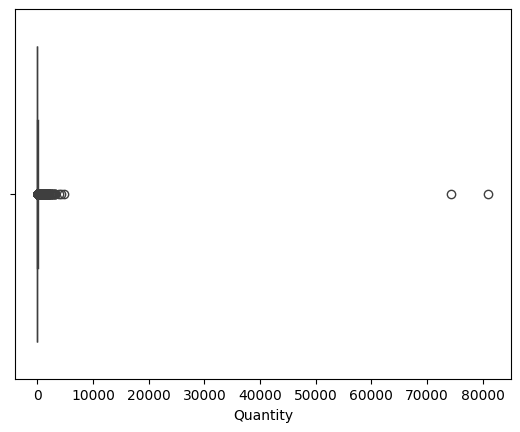

In [21]:
sns.boxplot(x=df3['Quantity'])

In [22]:
df3.Quantity.quantile([0.9999])

,Quantity
0.9999,1439.8764


In [23]:
df3[df3.Quantity > 1500].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom


### Feature Engineering: Create New Columns

In [24]:
df4 = df3.copy()
df4['TotalSales'] = df4['Quantity'] * df4['UnitPrice']
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [25]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
405291,571713,22798,ANTIQUE GLASS DRESSING TABLE POT,1,2011-10-18 16:58:00,5.79,NaN,United Kingdom,5.79,10
61683,541480,16168M,FUNKY MONKEY GIFT BAG MEDIUM,24,2011-01-18 12:05:00,0.42,12527.0,Germany,10.08,1
276637,561068,85066,CREAM SWEETHEART MINI CHEST,2,2011-07-24 14:33:00,12.75,13116.0,United Kingdom,25.50,7
531050,580903,21918,SET 12 KIDS COLOUR CHALK STICKS,1,2011-12-06 12:56:00,0.42,14606.0,United Kingdom,0.42,12
151710,549567,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-04-10 15:07:00,2.95,13632.0,United Kingdom,5.90,4


### Visualization and EDA

####1. Plot Monthly Sales

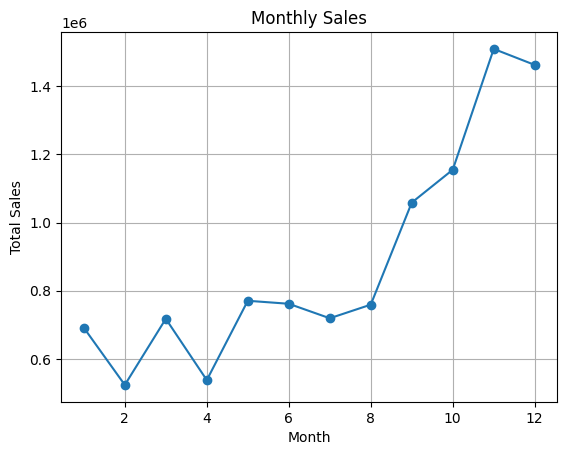

In [26]:
monthly_sales = df4.groupby('Month')['TotalSales'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

**Insights**

The total sales started rising up in August upto November.

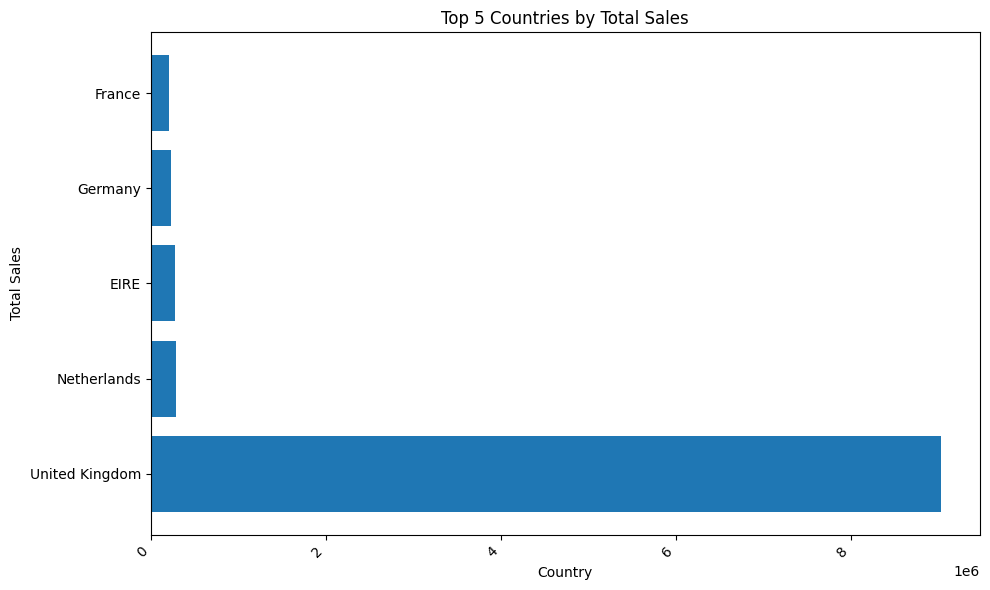

In [27]:
# prompt: Generate a bar chart of top 5 countries and their total sales

import matplotlib.pyplot as plt
# Group by country and calculate total sales
country_sales = df4.groupby('Country')['TotalSales'].sum()

# Sort the total sales in descending order and get the top 5 countries
top_5_countries = country_sales.sort_values(ascending=False).head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries.index, top_5_countries.values)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 5 Countries by Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


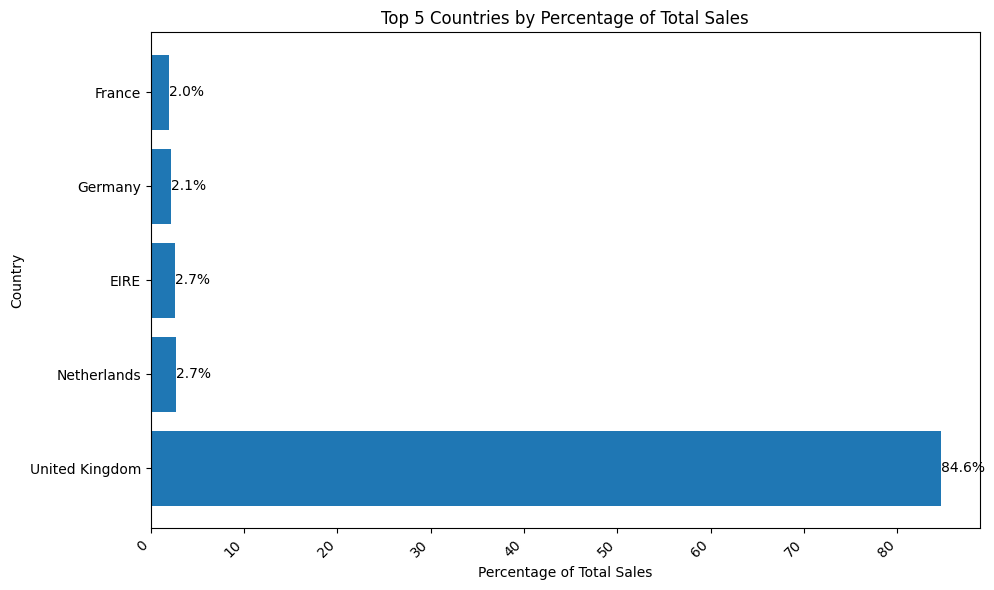

In [28]:
# prompt: show same chart as above but use percentage from total sales. show % on the bar

import matplotlib.pyplot as plt
# Calculate the total sales for all countries
total_sales = df4['TotalSales'].sum()

# Calculate the percentage of total sales for each country
country_sales_percentage = (country_sales / total_sales) * 100

# Sort the percentage of total sales in descending order and get the top 5 countries
top_5_countries_percentage = country_sales_percentage.sort_values(ascending=False).head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_countries_percentage.index, top_5_countries_percentage.values)
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage of Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add percentage values on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', ha='left', va='center')

plt.show()


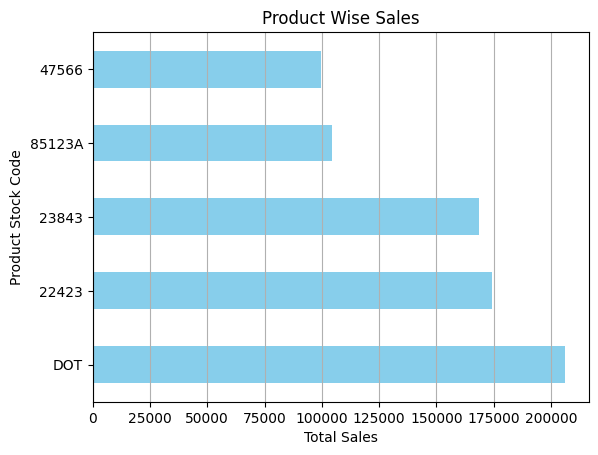

In [29]:
product_wise_sales = df4.groupby('StockCode')['TotalSales'].sum()
top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product Wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.grid(axis='x')
plt.show()

In [30]:
df4[df4.StockCode == 'DOT'].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12


In [31]:
for stockCode in top_5_products.index:
  desc = df4[df4.StockCode == stockCode].Description.iloc[0]
  print(f'{stockCode} => {desc}')

DOT => DOTCOM POSTAGE
22423 => REGENCY CAKESTAND 3 TIER
23843 => PAPER CRAFT , LITTLE BIRDIE
85123A => WHITE HANGING HEART T-LIGHT HOLDER
47566 => PARTY BUNTING


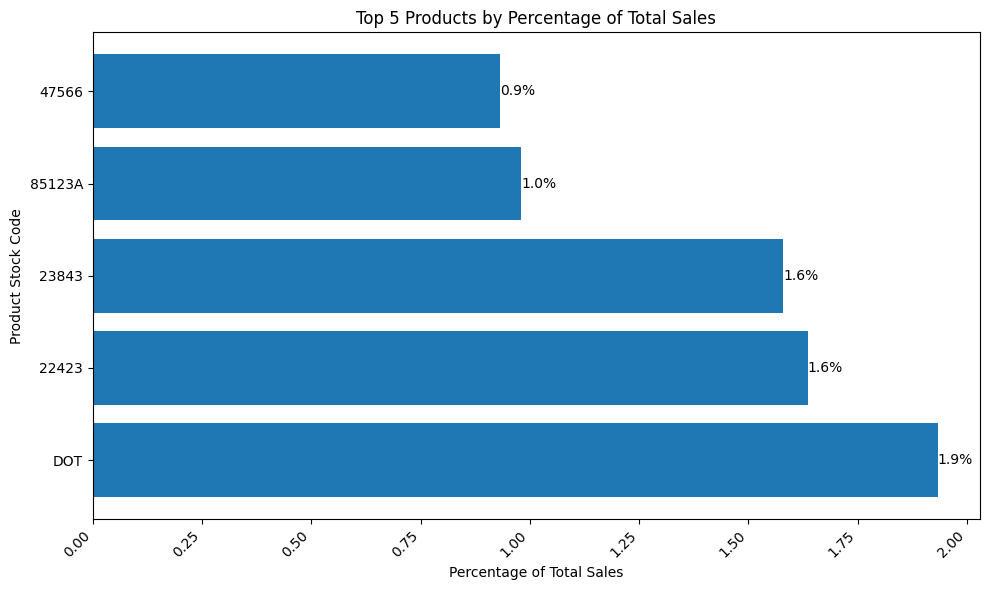

In [32]:
# prompt: plot the same chart as above for product sales and use percentage of total sales. Show % on the bar.

import matplotlib.pyplot as plt
# Calculate the total sales for all products
total_product_sales = df4['TotalSales'].sum()

# Calculate the percentage of total sales for each product
product_sales_percentage = (product_wise_sales / total_product_sales) * 100

# Sort the percentage of total sales in descending order and get the top 5 products
top_5_products_percentage = product_sales_percentage.sort_values(ascending=False).head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products_percentage.index, top_5_products_percentage.values)
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Percentage of Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add percentage values on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', ha='left', va='center')

plt.show()


4. RFM Analysis

In [33]:
current_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [34]:
rfm = df4.groupby('CustomerID').agg({'InvoiceDate': lambda x: (current_date - x.max()).days,
                                     'InvoiceNo': 'count',
                                     'TotalSales': 'sum'})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head(3)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24


In [35]:
df4[df4.CustomerID == 12346]['TotalSales'].sum()


np.float64(77183.6)

In [36]:
rfm['R_Segment'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4


In [37]:
rfm.sort_values(by='RFM_Score', ascending=False).head()

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18198.0,4,159,5425.56,4,4,4,12
18210.0,2,134,2621.38,4,4,4,12
18225.0,3,271,5509.12,4,4,4,12
18283.0,4,756,2094.88,4,4,4,12
16983.0,13,148,1931.25,4,4,4,12


5. Customer Churn Analysis

In [38]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [39]:
customer_last_purchase = df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase.head()

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [40]:
current_date

Timestamp('2011-12-10 12:50:00')

In [51]:
customer_recency = (current_date - customer_last_purchase).dt.days
customer_recency.head()

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [52]:
# Define Churn Threshold (e.g. 90 days without purchase)
churn_threshold = 90

churned_customers = customer_recency[customer_recency >= churn_threshold]
churned_customers.head()

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned Customer:  1458


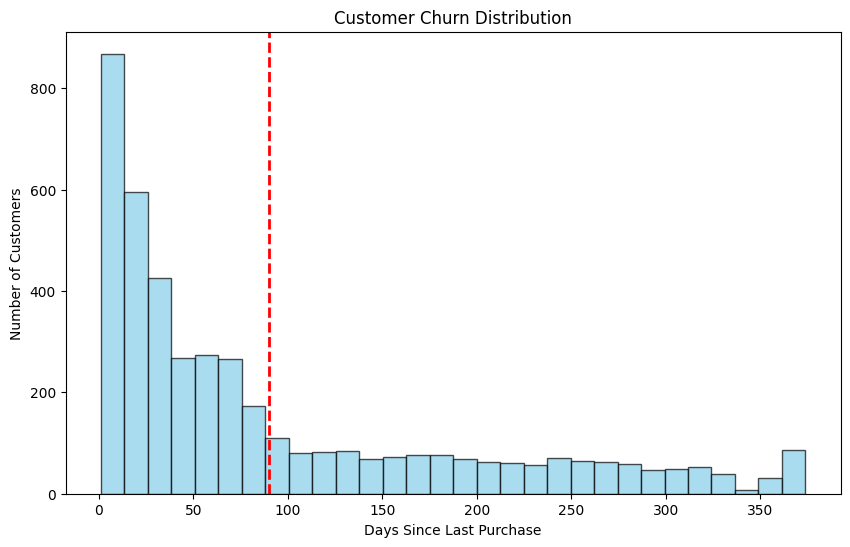

In [53]:
print('Number of Churned Customer: ', len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_recency, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=churn_threshold, color='red', linestyle='dashed', linewidth=2, label=f'Churn Threshold ({churn_threshold} days)')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')
plt.show()